In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
def getInfo(indata):
    """Print Dataframe information"""
    print(indata.head())
    print(indata.shape)
    print(indata.tail(3))

 seaborn.countplot(x=None, y=None, hue=None, data=None, 
                   order=None, hue_order=None, orient=None, 
                   color=None, palette=None, saturation=0.75, 
                   dodge=True, ax=None, **kwargs)
 

In [27]:
#data = pd.read_csv("C:\\data\\DataScience\\DataSets\\Autism-Screening\\Toddler Autism dataset.csv")
data = pd.read_csv("C:\\data\\DataScience\\Projects\\capstone\\proj1\\Toddler Autism dataset.csv")
#print(data.info())  #call function to print info if needed
data['JaundiceCode']= data.Jaundice.eq('yes').mul(1)
data['ASDCode']= data.ASD.eq('Yes').mul(1)
data['SexCode']= data.Sex.eq('m').mul(1)
data['FamilyASDCode']= data.Family_mem_with_ASD.eq('yes').mul(1)
#getInfo(data)
#print(data.columns)

 seaborn.countplot(x=None, y=None, hue=None, data=None, 
                   order=None, hue_order=None, orient=None, 
                   color=None, palette=None, saturation=0.75, 
                   dodge=True, ax=None, **kwargs)
 
Index(['Case_No', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'Age_Mons',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Who completed the test', 'ASD', 'JaundiceCode', 'ASDCode'],
      dtype='object')
   

In [29]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 23 columns):
Case_No                   1054 non-null int64
A1_Score                  1054 non-null int64
A2_Score                  1054 non-null int64
A3_Score                  1054 non-null int64
A4_Score                  1054 non-null int64
A5_Score                  1054 non-null int64
A6_Score                  1054 non-null int64
A7_Score                  1054 non-null int64
A8_Score                  1054 non-null int64
A9_Score                  1054 non-null int64
A10_Score                 1054 non-null int64
Age_Mons                  1054 non-null int64
Qchat-10-Score            1054 non-null int64
Sex                       1054 non-null object
Ethnicity                 1054 non-null object
Jaundice                  1054 non-null object
Family_mem_with_ASD       1054 non-null object
Who completed the test    1054 non-null object
ASD                       1054 non-null object
JaundiceCode 

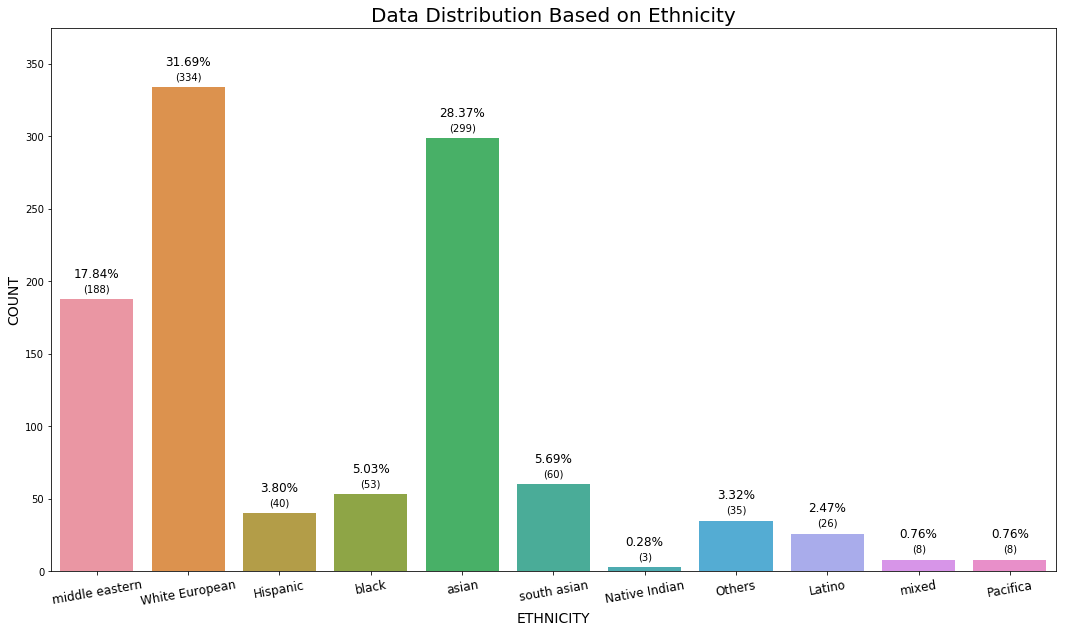

In [6]:
plt.figure(figsize = (18,10))
ax=sns.countplot(x = 'Ethnicity' , data = data,  orient="H")
total = float(len(data))
#print(total)
ax.set_title("Data Distribution Based on Ethnicity", fontsize=20)
plt.ylabel("COUNT", fontsize=14)
plt.xlabel("ETHNICITY", fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="center", fontsize=12)
#plt.tight_layout()  #for making it more compact
plt.ylim(0, 375)
for p in ax.patches:
    height = p.get_height()
    #print(height)
    ax.text(p.get_x()+p.get_width()/2.,
    height + 15,
    '{:1.2f}%'.format(height/total*100) ,
    ha="center", fontsize=12)   
    ax.text(p.get_x()+p.get_width()/2.,
    height + 5,
    '({:1.0f})'.format(height),
    ha="center", fontsize=10) 
plt.show()

Above figure shows the data distribution based on the Ethnicity of the todler. Majority of the sample is from Middle Eastern, White European and Asian ethnicity 



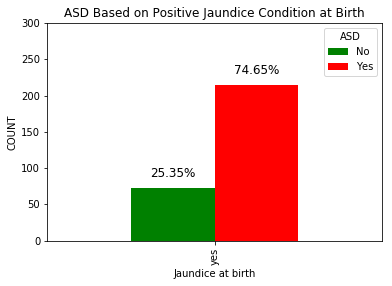

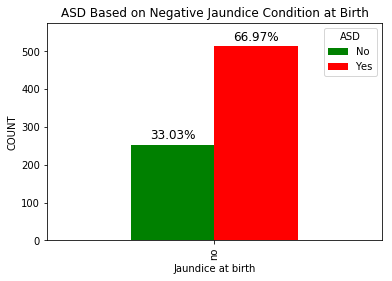

In [7]:

asd_yes=data.loc[data['Jaundice'] == 'yes']
asd_no=data.loc[data['Jaundice'] == 'no']
#print(asd_yes)
#print(asd_yes.info())

ax=pd.crosstab(asd_yes.Jaundice, asd_yes.ASD).plot(kind='bar', stacked=False, color=['green','red'], grid=False)
#ct=pd.crosstab(data.Jaundice, data.ASD)
#print(ct)
plt.ylabel("COUNT", fontsize=10)
plt.xlabel("Jaundice at birth", fontsize=10)
ax.set_title("ASD Based on Positive Jaundice Condition at Birth", fontsize=12)
ax.plot(1,2,1)
total = float(len(asd_yes))
plt.ylim(0, 300)
for p in ax.patches:
    height = p.get_height()
    #print(height)
    ax.text(p.get_x()+p.get_width()/2.,
    height + 15,
    '{:1.2f}%'.format(height/total*100) ,
    ha="center", fontsize=12)   
#plt.subplot(1, 2, 2)
ax=pd.crosstab(asd_no.Jaundice, asd_no.ASD).plot(kind='bar', stacked=False, color=['green','red'], grid=False)
plt.ylabel("COUNT", fontsize=10)
plt.xlabel("Jaundice at birth", fontsize=10)
ax.set_title("ASD Based on Negative Jaundice Condition at Birth", fontsize=12)
total = float(len(asd_no))
plt.ylim(0, 575)
for p in ax.patches:
    height = p.get_height()
    #print(height)
    ax.text(p.get_x()+p.get_width()/2.,
    height + 15,
    '{:1.2f}%'.format(height/total*100) ,
    ha="center", fontsize=12)   
plt.show()


Above plots shows the Jaundice condition influence on ASD and it does seems to contribute to ASD condition


170.0
884.0


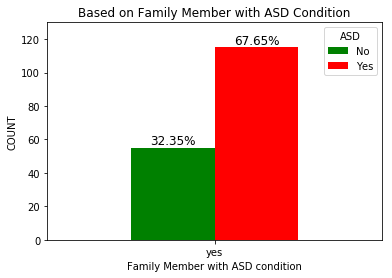

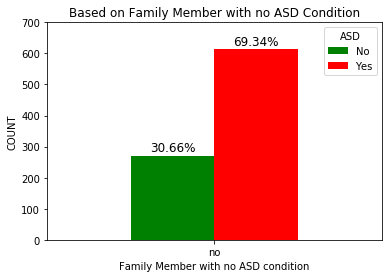

In [8]:
fm_asd_yes=data.loc[data['Family_mem_with_ASD'] == 'yes']
fm_asd_no=data.loc[data['Family_mem_with_ASD'] == 'no']
#print(asd_yes)
#print(asd_yes.info())
#plt.subplot(1, 2, 1)
ax=pd.crosstab(fm_asd_yes.Family_mem_with_ASD, fm_asd_yes.ASD).plot(kind='bar', stacked=False, color=['green','red'], grid=False)
#ct=pd.crosstab(data.Jaundice, data.ASD)
#print(ct)
plt.ylabel("COUNT", fontsize=10)
plt.xlabel("Family Member with ASD condition", fontsize=10)
ax.set_title("Based on Family Member with ASD Condition", fontsize=12)
total = float(len(fm_asd_yes))
print(total)
plt.ylim(0, 130)
for p in ax.patches:
    height = p.get_height()
    #print(height)
    ax.text(p.get_x()+p.get_width()/2.,
    height +2,
    '{:1.2f}%'.format(height/total*100) ,
    ha="center", fontsize=12)  
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize=10)
#plt.subplot(1, 2, 2)

ax=pd.crosstab(fm_asd_no.Family_mem_with_ASD, fm_asd_no.ASD).plot(kind='bar', stacked=False, color=['green','red'], grid=False)
plt.ylabel("COUNT", fontsize=10)
plt.xlabel("Family Member with no ASD condition", fontsize=10)
ax.set_title("Based on Family Member with no ASD Condition", fontsize=12)
total = float(len(fm_asd_no))
print(total)
plt.ylim(0, 700)
for p in ax.patches:
    height = p.get_height()
    #print(height)
    ax.text(p.get_x()+p.get_width()/2.,
    height + 15,
    '{:1.2f}%'.format(height/total*100) ,
    ha="center", fontsize=12)   
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize=10)
plt.show()

Above is the plot showing distribution of ASD condition based on if the ASD condition existed in any of the family member. The above plot doesn't show much if Family member with ASD condition contributes to ASD condition in todler.


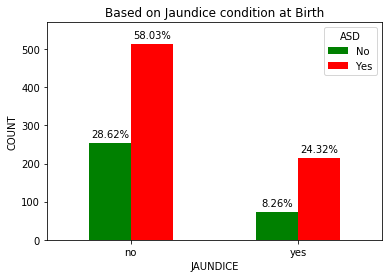

In [9]:
#pd.crosstab(data.ASD, data.Jaundice).plot(kind='bar')
ax=pd.crosstab(data.Jaundice, data.ASD).plot(kind='bar', stacked=False, color=['green','red'], grid=False)
#ct=pd.crosstab(data.Jaundice, data.ASD)
#print(ct)
plt.ylabel("COUNT", fontsize=10)
plt.xlabel("JAUNDICE", fontsize=10)
ax.set_title("Based on Jaundice condition at Birth", fontsize=12)
plt.ylim(0, 570)
for p in ax.patches:
    height = p.get_height()
    #print(height)
    ax.text(p.get_x()+p.get_width()/2.,
    height + 15,
    '{:1.2f}%'.format(height/total*100) ,
    ha="center", fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize=10)
plt.show()

Above plot shows the distribution of ASD cases based on Jaundice condition at birth.


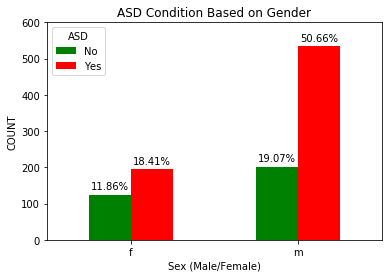

In [10]:
ax=pd.crosstab(data.Sex, data.ASD).plot(kind='bar', stacked=False, color=['green','red'], grid=False)
plt.ylabel("COUNT", fontsize=10)
plt.xlabel("Sex (Male/Female)", fontsize=10)
ax.set_title("ASD Condition Based on Gender", fontsize=12)
total = float(len(data))
plt.ylim(0, 600)
for p in ax.patches:
    height = p.get_height()
    #print(height)
    ax.text(p.get_x()+p.get_width()/2.,
    height + 15,
    '{:1.2f}%'.format(height/total*100) ,
    ha="center", fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize=10)
plt.show()

Above is the plot showing distribution of ASD cases based on Gender. Its quite evident that the condition is more prominent in males.


Deactivated this section as still in WIP

#pd.crosstab(data.ASD, data.Jaundice).plot(kind='bar')
#ax=pd.crosstab(data.Jaundice, data.ASD).plot(kind='bar', stacked=False, color=['green','red'], grid=False)
ax=pd.crosstab(data.Jaundice, data.ASD).plot(kind='bar', stacked=False, color=['green','red'], grid=False)
#ct=pd.crosstab(data.Jaundice, data.ASD)
#print(ct)
plt.ylabel("COUNT", fontsize=10)
plt.xlabel("JAUNDICE", fontsize=10)
total = float(len(data))
#yj_total = float(len(data.loc[data['Jaundice'] == 'yes']))
#nj_total = float(len(data.loc[data['Jaundice'] == 'no']))
#print(total)
#print(yj_total)
#print(nj_total)
plt.ylim(0, 570)
for p in ax.patches:
    height = p.get_height()
    #print(height)
    ax.text(p.get_x()+p.get_width()/2.,
    height + 15,
    '{:1.2f}%'.format(height/total*100) ,
    ha="center", fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize=10)
plt.show()

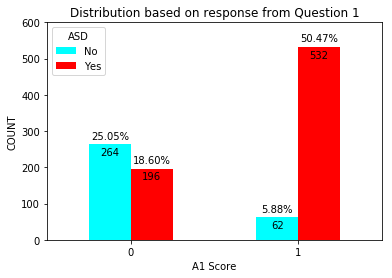

In [11]:
#pd.crosstab(data.ASD, data.Jaundice).plot(kind='bar')
ax=pd.crosstab(data.A1_Score, data.ASD).plot(kind='bar', stacked=False, color=['aqua','red'], grid=False)
#ct=pd.crosstab(data.Jaundice, data.ASD)
#print(ct)
plt.ylabel("COUNT", fontsize=10)
plt.xlabel("A1 Score", fontsize=10)
ax.set_title("Distribution based on response from Question 1", fontsize=12)
plt.ylim(0, 600)
for p in ax.patches:
    height = p.get_height()
    #print(height)
    ax.text(p.get_x()+p.get_width()/2.,
    height + 15,
    '{:1.2f}%'.format(height/total*100) ,
    ha="center", fontsize=10)
    ax.text(p.get_x()+p.get_width()/2.,
    height -30 ,
    '{:1.0f}'.format(height),
    ha="center", fontsize=10) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize=10)
plt.show()

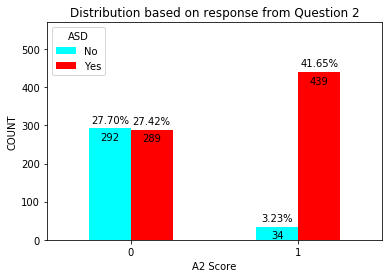

In [12]:
#pd.crosstab(data.ASD, data.Jaundice).plot(kind='bar')
ax=pd.crosstab(data.A2_Score, data.ASD).plot(kind='bar', stacked=False, color=['aqua','red'], grid=False)
#ct=pd.crosstab(data.Jaundice, data.ASD)
#print(ct)
plt.ylabel("COUNT", fontsize=10)
plt.xlabel("A2 Score", fontsize=10)
ax.set_title("Distribution based on response from Question 2", fontsize=12)
plt.ylim(0, 570)
for p in ax.patches:
    height = p.get_height()
    #print(height)
    ax.text(p.get_x()+p.get_width()/2.,
    height + 15,
    '{:1.2f}%'.format(height/total*100) ,
    ha="center", fontsize=10)
    ax.text(p.get_x()+p.get_width()/2.,
    height -30 ,
    '{:1.0f}'.format(height),
    ha="center", fontsize=10) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize=10)
plt.show()

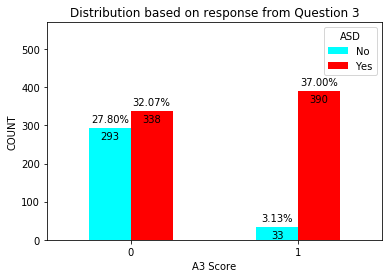

In [13]:

ax=pd.crosstab(data.A3_Score, data.ASD).plot(kind='bar', stacked=False, color=['aqua','red'], grid=False)
plt.ylabel("COUNT", fontsize=10)
plt.xlabel("A3 Score", fontsize=10)
ax.set_title("Distribution based on response from Question 3", fontsize=12)
plt.ylim(0, 570)
for p in ax.patches:
    height = p.get_height()
    #print(height)
    ax.text(p.get_x()+p.get_width()/2.,
    height + 15,
    '{:1.2f}%'.format(height/total*100) ,
    ha="center", fontsize=10)
    ax.text(p.get_x()+p.get_width()/2.,
    height -30 ,
    '{:1.0f}'.format(height),
    ha="center", fontsize=10) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize=10)
plt.show()

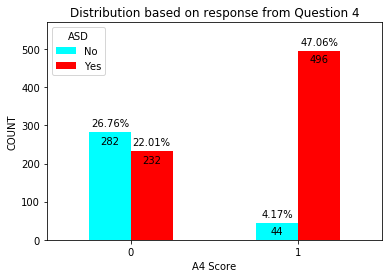

In [14]:
ax=pd.crosstab(data.A4_Score, data.ASD).plot(kind='bar', stacked=False, color=['aqua','red'], grid=False)
plt.ylabel("COUNT", fontsize=10)
plt.xlabel("A4 Score", fontsize=10)
ax.set_title("Distribution based on response from Question 4", fontsize=12)
plt.ylim(0, 570)
for p in ax.patches:
    height = p.get_height()
    #print(height)
    ax.text(p.get_x()+p.get_width()/2.,
    height + 15,
    '{:1.2f}%'.format(height/total*100) ,
    ha="center", fontsize=10)
    ax.text(p.get_x()+p.get_width()/2.,
    height -30 ,
    '{:1.0f}'.format(height),
    ha="center", fontsize=10) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize=10)
plt.show()

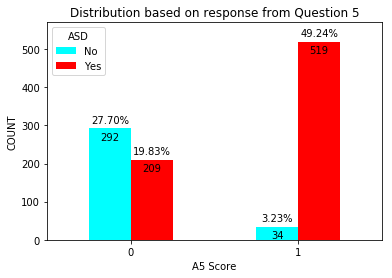

In [15]:
ax=pd.crosstab(data.A5_Score, data.ASD).plot(kind='bar', stacked=False, color=['aqua','red'], grid=False)
plt.ylabel("COUNT", fontsize=10)
plt.xlabel("A5 Score", fontsize=10)
ax.set_title("Distribution based on response from Question 5", fontsize=12)
plt.ylim(0, 570)
for p in ax.patches:
    height = p.get_height()
    #print(height)
    ax.text(p.get_x()+p.get_width()/2.,
    height + 15,
    '{:1.2f}%'.format(height/total*100) ,
    ha="center", fontsize=10)
    ax.text(p.get_x()+p.get_width()/2.,
    height -30 ,
    '{:1.0f}'.format(height),
    ha="center", fontsize=10) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize=10)
plt.show()

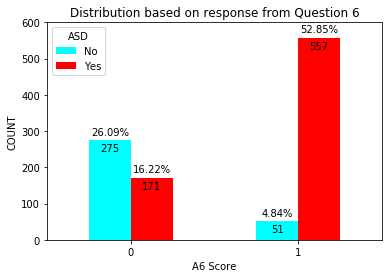

In [16]:
ax=pd.crosstab(data.A6_Score, data.ASD).plot(kind='bar', stacked=False, color=['aqua','red'], grid=False)
plt.ylabel("COUNT", fontsize=10)
plt.xlabel("A6 Score", fontsize=10)
ax.set_title("Distribution based on response from Question 6", fontsize=12)
plt.ylim(0, 600)
for p in ax.patches:
    height = p.get_height()
    #print(height)
    ax.text(p.get_x()+p.get_width()/2.,
    height + 15,
    '{:1.2f}%'.format(height/total*100) ,
    ha="center", fontsize=10)
    ax.text(p.get_x()+p.get_width()/2.,
    height -30 ,
    '{:1.0f}'.format(height),
    ha="center", fontsize=10) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize=10)
plt.show()

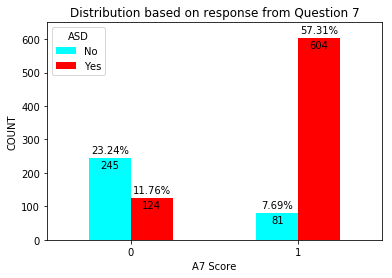

In [17]:
ax=pd.crosstab(data.A7_Score, data.ASD).plot(kind='bar', stacked=False, color=['aqua','red'], grid=False)
plt.ylabel("COUNT", fontsize=10)
plt.xlabel("A7 Score", fontsize=10)
ax.set_title("Distribution based on response from Question 7", fontsize=12)
plt.ylim(0, 650)
for p in ax.patches:
    height = p.get_height()
    #print(height)
    ax.text(p.get_x()+p.get_width()/2.,
    height + 15,
    '{:1.2f}%'.format(height/total*100) ,
    ha="center", fontsize=10)
    ax.text(p.get_x()+p.get_width()/2.,
    height -30 ,
    '{:1.0f}'.format(height),
    ha="center", fontsize=10) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize=10)
plt.show()

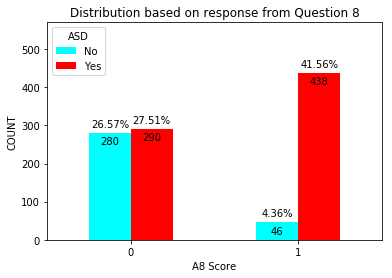

In [18]:
ax=pd.crosstab(data.A8_Score, data.ASD).plot(kind='bar', stacked=False, color=['aqua','red'], grid=False)
plt.ylabel("COUNT", fontsize=10)
plt.xlabel("A8 Score", fontsize=10)
ax.set_title("Distribution based on response from Question 8", fontsize=12)
plt.ylim(0, 570)
for p in ax.patches:
    height = p.get_height()
    #print(height)
    ax.text(p.get_x()+p.get_width()/2.,
    height + 15,
    '{:1.2f}%'.format(height/total*100) ,
    ha="center", fontsize=10)
    ax.text(p.get_x()+p.get_width()/2.,
    height -30 ,
    '{:1.0f}'.format(height),
    ha="center", fontsize=10) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize=10)
plt.show()

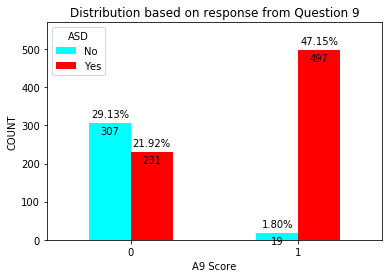

In [19]:
ax=pd.crosstab(data.A9_Score, data.ASD).plot(kind='bar', stacked=False, color=['aqua','red'], grid=False)
plt.ylabel("COUNT", fontsize=10)
plt.xlabel("A9 Score", fontsize=10)
ax.set_title("Distribution based on response from Question 9", fontsize=12)
plt.ylim(0, 570)
for p in ax.patches:
    height = p.get_height()
    #print(height)
    ax.text(p.get_x()+p.get_width()/2.,
    height + 15,
    '{:1.2f}%'.format(height/total*100) ,
    ha="center", fontsize=10)
    ax.text(p.get_x()+p.get_width()/2.,
    height -30 ,
    '{:1.0f}'.format(height),
    ha="center", fontsize=10) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize=10)
plt.show()

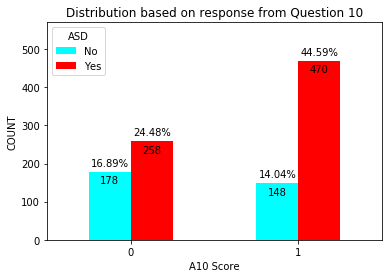

In [20]:
ax=pd.crosstab(data.A10_Score, data.ASD).plot(kind='bar', stacked=False, color=['aqua','red'], grid=False)
plt.ylabel("COUNT", fontsize=10)
plt.xlabel("A10 Score", fontsize=10)
ax.set_title("Distribution based on response from Question 10", fontsize=12)
plt.ylim(0, 570)
for p in ax.patches:
    height = p.get_height()
    #print(height)
    ax.text(p.get_x()+p.get_width()/2.,
    height + 15,
    '{:1.2f}%'.format(height/total*100) ,
    ha="center", fontsize=10)
    ax.text(p.get_x()+p.get_width()/2.,
    height -30 ,
    '{:1.0f}'.format(height),
    ha="center", fontsize=10) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize=10)
plt.show()

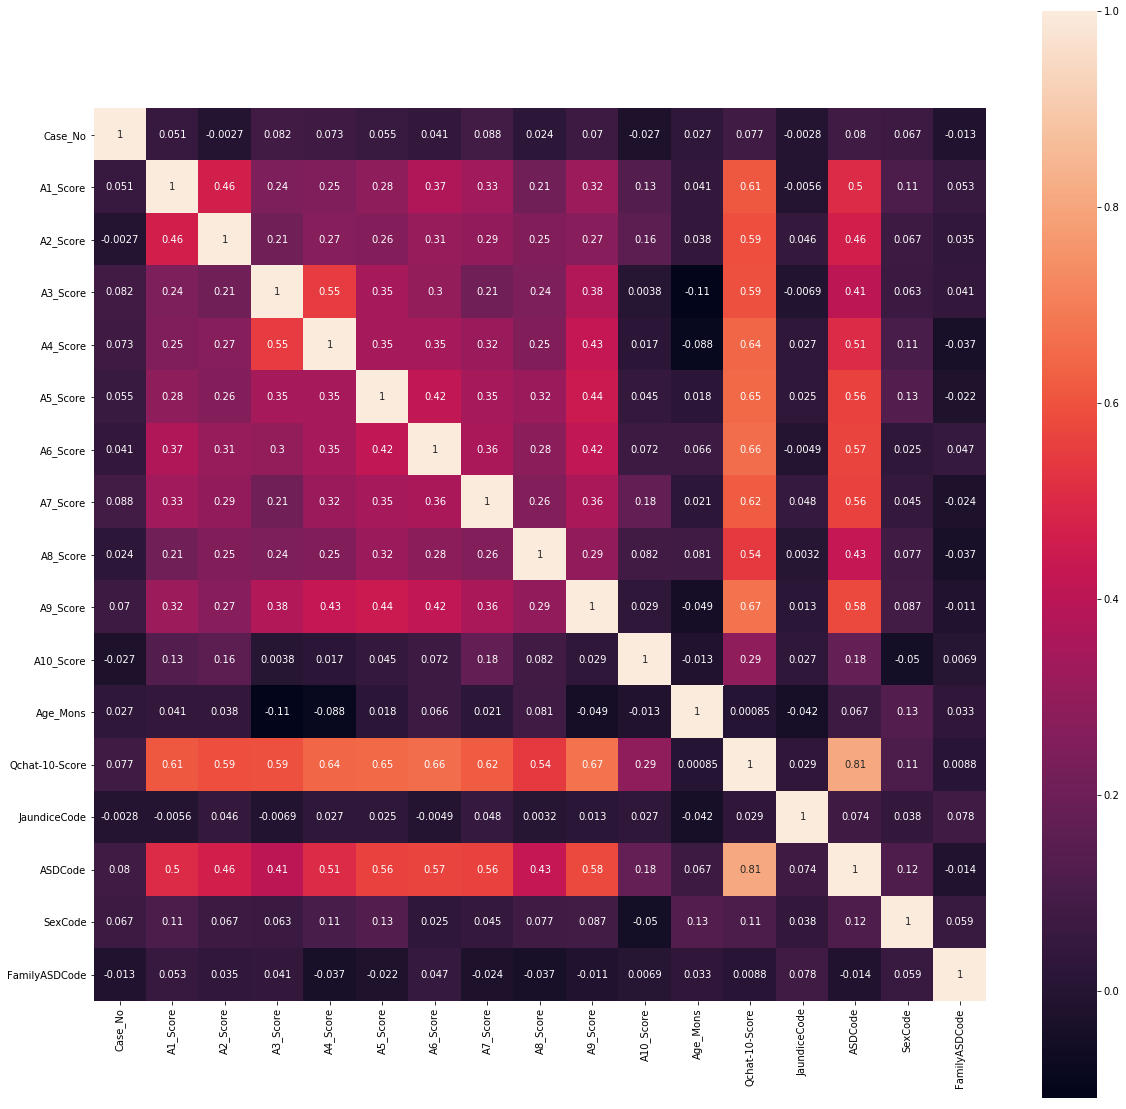

In [21]:
corr = data.corr()
plt.figure(figsize = (20,20))
sns.heatmap(data = corr, annot = True, square = True, cbar = True)
plt.show()

In [22]:
X=data[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'Age_Mons', 'Qchat-10-Score', 'SexCode',
       'JaundiceCode', 'FamilyASDCode']]
y=data['ASDCode']

#print(X)
#print(y)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()
lgr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
#print(y_test)

In [25]:
pred=lgr.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test,y_pred=pred))

             precision    recall  f1-score   support

          0       0.99      0.95      0.97       103
          1       0.98      1.00      0.99       214

avg / total       0.98      0.98      0.98       317



In [26]:
from sklearn.metrics import confusion_matrix


confusion_df = pd.DataFrame(confusion_matrix(y_true=y_test,y_pred=pred),
             columns=["Predicted Class " + str(class_name) for class_name in [0,1]],
             index = ["Class " + str(class_name) for class_name in [0,1]])

print(confusion_df)






         Predicted Class 0  Predicted Class 1
Class 0                 98                  5
Class 1                  1                213


In [188]:
X14=data[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'Age_Mons', 'SexCode',
       'JaundiceCode', 'FamilyASDCode']]
y14=data['ASDCode']
X14.head()
print(len(X14))
X14.describe()


1054


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age_Mons,SexCode,JaundiceCode,FamilyASDCode
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,0.697343,0.273245,0.161290
std,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,0.459626,0.445837,0.367973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,1.000000,1.000000,1.000000


<h2>Predicting through KNN</h2>

In [158]:
from sklearn.neighbors import KNeighborsClassifier 

#X=np.asarray(X14)
#y=np.asarray(y14)
#print(type(X14)),print(type(y14))

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X14, y14, test_size = 0.30, random_state=40, stratify=y)

#print(X_train.shape),print(X_test.shape),print(y_train.shape),print(y_test.shape)
#print(type(X_train.shape)),print(type(X_test.shape)),print(type(y_train.shape)),print(type(y_test.shape))

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print("Score :",knn.score(X_test, y_test))
result=knn.predict(X_test)
#print(sum(result)),print(sum(y_test))#print(result)#print(y_test)

Score : 0.940063091483


<h2>Tuning "n_neighbors" parameter</h2>

Optimum n_neighbors value: 9   Test Accuracy: 0.952681388013


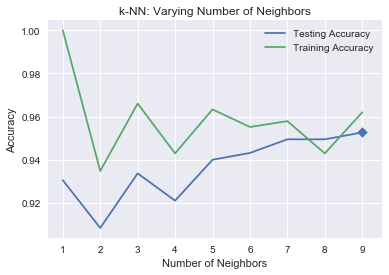

In [159]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data

    knn.fit(X_train, y_train)
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
sns.set()
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

max_loc=np.where(test_accuracy==(max(test_accuracy))) # get index of maximum value
#print(max_loc)
for var in np.asarray(max_loc[0]):
    print("Optimum n_neighbors value:", neighbors[var],"  Test Accuracy:",test_accuracy[var])
    plt.scatter(neighbors[var],test_accuracy[var], marker='D', s=50)
plt.show()


<b>Conclusion</b><br>
From the accuracy plot, n_neighbors = 5 or n_neighbors = 7 gives the best accuracy<br> 

In [160]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 92   6]
 [  9 210]]
             precision    recall  f1-score   support

          0       0.91      0.94      0.92        98
          1       0.97      0.96      0.97       219

avg / total       0.95      0.95      0.95       317




<h2>Tuning hyperparameter "n_neighbors" through Grid Search</h2>


In [161]:
from sklearn.model_selection import GridSearchCV

p_grid={"n_neighbors":np.arange(1,10)}
knn = KNeighborsClassifier()

knn_cv=GridSearchCV(knn, p_grid, cv=5)   # cv is the number of folds
knn_cv.fit(X,y)
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 7}
0.943074003795


<h2>Predicting through Logistic Regression</h2>

In [192]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create the classifier: logreg
logreg = LogisticRegression()
print(logreg)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [193]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)
#print(len(y_pred), sum(y_pred))
# Compute and print the confusion matrix and classification report
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion Matrix
[[ 94   4]
 [  0 219]]
             precision    recall  f1-score   support

          0       1.00      0.96      0.98        98
          1       0.98      1.00      0.99       219

avg / total       0.99      0.99      0.99       317



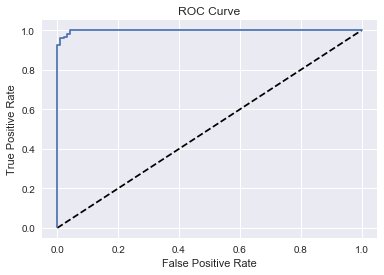

In [190]:
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds= roc_curve(y_test, y_pred_prob)

#print(fpr)
#print(tpr)
#print("thresholds",thresholds)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

<h2>Tuning hyperparameter for Logistic Regression</h2>

In [191]:
# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameter: {'C': 3.7275937203149381, 'penalty': 'l1'}
Tuned Logistic Regression Accuracy: 1.0


In [195]:
logreg=LogisticRegression(C=3.73, penalty='l1')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
#print(len(y_pred), sum(y_pred))
# Compute and print the confusion matrix and classification report
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion Matrix
[[ 98   0]
 [  0 219]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        98
          1       1.00      1.00      1.00       219

avg / total       1.00      1.00      1.00       317



<h2>Predicting through SVM</h2>

In [162]:
# Import necessary modules
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC


# Instantiate the SVC classifier: clf
clf = SVC()

clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))


             precision    recall  f1-score   support

          0       0.96      0.95      0.95        98
          1       0.98      0.98      0.98       219

avg / total       0.97      0.97      0.97       317



<h2>Tuning hyperparameter "C" and "gamma" SVM</h2>

In [197]:
# Specify the hyperparameter space
parameters = {'C':[1, 10, 100],
              'gamma':[0.1, 0.01]}

clf = SVC()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(clf,parameters)

# Fit to the training set
cv.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))


Accuracy: 0.9968454258675079
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        98
          1       1.00      1.00      1.00       219

avg / total       1.00      1.00      1.00       317

Tuned Model Parameters: {'C': 100, 'gamma': 0.01}


<b>Conclusion</b><br>
Extracted tuned hyperparameter for the SVM. It did improve the result


<b>Using tuned hyper parameter</b>

In [168]:
# Specify the hyperparameter space


clf = SVC(C=100, gamma=0.01)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=20)

# Fit to the training set
clf.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = clf.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        63
          1       1.00      1.00      1.00       148

avg / total       1.00      1.00      1.00       211



<h2>Predicting using Decision Tree</h2>

In [171]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
print(model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=40)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
             precision    recall  f1-score   support

          0       0.84      0.84      0.84        97
          1       0.93      0.93      0.93       220

avg / total       0.90      0.90      0.90       317



<h2>Predicting using RandomForest Classifier</h2>

In [178]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
print(model)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [179]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
             precision    recall  f1-score   support

          0       0.95      0.94      0.94        97
          1       0.97      0.98      0.98       220

avg / total       0.97      0.97      0.97       317

